[View in Colaboratory](https://colab.research.google.com/github/blasillo/CursoVyADatos/blob/master/regresi%C3%B3n_lineal.ipynb)

# Regresión linear

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


%matplotlib inline
import matplotlib.pyplot as plt


import tensorflow as tf





## Cargar datos

In [2]:
def cargar_datos():
  """
  leer fichero CSV  
  """
  datos = pd.read_csv("https://goo.gl/PQXxZ8")
  superficie = datos["Size"].values
  precio    = datos["Price"].values
  return superficie, precio



# leer el fichero de datos
superficie, precio  = cargar_datos()

# Ver longitud datos.
print("Numero de datos: ", len(superficie))


# dividir los datos en conjuntos train y test
X_train, X_test, Y_train, Y_test = train_test_split(superficie, precio , test_size=0.33, random_state=42)

print("Datos de entrenamiento: ", len(X_train))
print("Datos de test : ", len(X_test))


('Numero de datos: ', 779)
('Datos de entrenamiento: ', 521)
('Datos de test : ', 258)


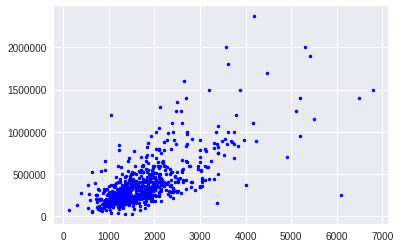

In [3]:
plt.plot(superficie, precio, 'b.')
    
plt.show()

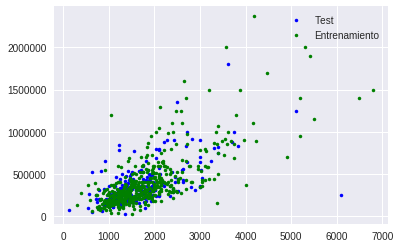

In [4]:
plt.plot(X_test , Y_test, 'b.', label='Test')
plt.plot(X_train, Y_train, 'g.', label='Entrenamiento')
plt.legend()
    
plt.show()

## Normalizar los datos

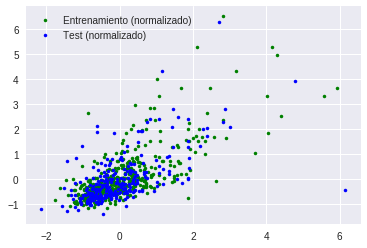

In [5]:
def normaliza (array): 
    return (array - array.mean()) / array.std()

  
  
X_train = normaliza(X_train)
Y_train = normaliza(Y_train)

X_test = normaliza(X_test)
Y_test = normaliza(Y_test)



plt.plot(X_train, Y_train, 'g.', label='Entrenamiento (normalizado)')
plt.plot(X_test , Y_test, 'b.', label='Test (normalizado)')
plt.legend()
    
plt.show()

## Entrenando el modelo

In [8]:
def obtener_modelo ():
  """
  funcion para obtener modelo lineal con tensores
  """
  X = tf.placeholder("float")
  Y = tf.placeholder("float")
  # crear modelo
  w = tf.Variable(np.random.randn(), name="weight")
  b = tf.Variable(np.random.randn(), name="bias")
  modelo = tf.add(tf.multiply(X, w), b)
  return X, Y, w, b, modelo


def optimizador_coste (Y, modelo, lote , learning_rate ):
  # funcion de coste
  funcion_coste = tf.reduce_sum(tf.pow(modelo - Y, 2))/(2 * lote) 
  
  # gradient descent
  gradient_descent = tf.train.GradientDescentOptimizer(learning_rate) 
  
  # optimizador
  optimizador = gradient_descent.minimize(funcion_coste)
  
  return optimizador, funcion_coste
  
  

 Iteracion: 0001 coste = 0.259039849 w= 0.8104835 b= 0.25234786
Iteracion: 0006 coste = 0.237366915 w= 0.7832306 b= 0.15275066
Iteracion: 0011 coste = 0.229417354 w= 0.7667094 b= 0.092350625
Iteracion: 0016 coste = 0.226506457 w= 0.7566964 b= 0.055721257
Iteracion: 0021 coste = 0.225443602 w= 0.7506282 b= 0.033507433
Iteracion: 0026 coste = 0.225057364 w= 0.7469485 b= 0.020035902
Iteracion: 0031 coste = 0.224918127 w= 0.74472153 b= 0.011866168
Iteracion: 0036 coste = 0.224868640 w= 0.7433704 b= 0.006911671
Iteracion: 0041 coste = 0.224851444 w= 0.74255013 b= 0.003907025
Iteracion: 0046 coste = 0.224845737 w= 0.742053 b= 0.0020848638

Entrenamiento completado: coste= 0.224844232 w= 0.74179995 b= 0.0011589576

Coste (error) en datos de test: 0.15838091


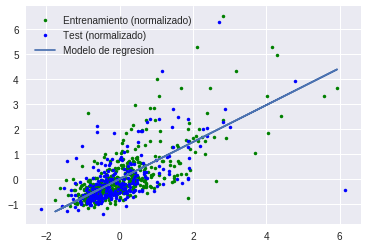

In [10]:
# parametros 
learning_rate = 0.1
iteraciones   = 50


# preparar variables
X, Y, w, b, modelo = obtener_modelo()
optimizador, funcion_coste = optimizador_coste (Y, modelo, len(X_train), learning_rate )


# Initialize variables
init = tf.global_variables_initializer()


# Entrenar el modelo
with tf.Session() as sess:
    sess.run(init)
    
    for iteracion in range(iteraciones):
        for (x, y) in zip(X_train, Y_train):
            sess.run(optimizador, feed_dict={X: x, Y: y})
            
        if iteracion % 5 == 0:
          print "Iteracion:", '%04d' % (iteracion + 1), "coste =", "{:.9f}".format(sess.run(funcion_coste, feed_dict={X:X_train, Y:Y_train})),\
        "w=", sess.run(w), "b=", sess.run(b)
          
    
    print ""
    coste_final = sess.run(funcion_coste, feed_dict={X: X_train, Y: Y_train})            
    print "Entrenamiento completado:", "coste=", "{:.9f}".format(coste_final), "w=", sess.run(w), "b=", sess.run(b)
    
    
    print ""
    coste_test = sess.run(funcion_coste, feed_dict={X: X_test, Y: Y_test})    
    print "Coste (error) en datos de test:" , coste_test
    
    
    
    plt.figure()
    plt.plot(X_train, Y_train, 'g.', label='Entrenamiento (normalizado)')
    plt.plot(X_test, Y_test, 'b.', label='Test (normalizado)')
    plt.plot(X_train, sess.run(w) * X_train + sess.run(b), label='Modelo de regresion')
    plt.legend()
    
    plt.show()
